# Lesson 21 - Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA 

## Introduction to PCA

**Principal component analysis** is an unsupervised **dimensionality reduction** technique. It allows us to reduce a dataset with a large number of features (dimensions) to one with a smaller number of dimensions, hopefully without losing too much information in the process. 

One method of performing dimensionality reduction in a supervised learning task is to simply remove from the dataset features that are deemed to not have much influence on the response variable. This method of dimensionality reduction is referred to as **feature selection**. The lasso algorithm performs a type of automatic feature selection. 

The type of dimensionality reduction performed in PCA, on the other hand, is referred to as **feature extraction**. In feature extraction methods, the features are transformed into new features are are in some way functions of the old features. The goal of PCA is to extract new features that capture most of the information contained in the original dataset, but with fewer features. 

To illustrate the idea behind PCA, we will consider an example.

In [2]:
np.random.seed(1)
n = 50

# Generate approximation of transformed coordinates
z0 = np.random.normal(0,1.2,n).reshape(n,1)
z1 = np.random.normal(0,0.6,n).reshape(n,1)
z2 = np.random.normal(0,0.2,n).reshape(n,1)
Z_ = np.concatenate([z0,z1,z2], axis = 1)

# Approximation of principal components
pc0 = np.array([4,2,1])/np.sqrt(21)
pc1 = np.array([-1,1,2])/np.sqrt(5)
pc2 = np.array([3,-9,6])/np.sqrt(126)

# Generate 'original data'
X = z0*pc0 + z1*pc1 + z2*pc2 + np.array([3,3,3])

# Find transformed coordinates and principal components
pca = PCA(n_components=3)
Z = pca.fit_transform(X)
pc = pca.components_
mu = np.mean(X, axis=0)

<IPython.core.display.Javascript object>


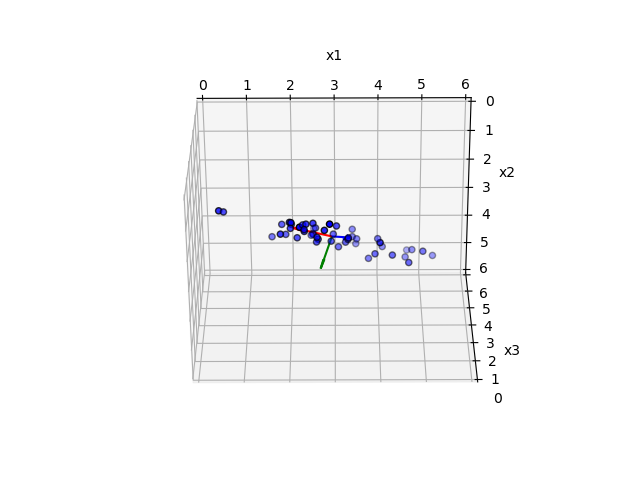

In [7]:
%matplotlib notebook
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], s=20, marker = 'o', c='b', edgecolor='k', label=0)

ax.quiver(mu[0], mu[1], mu[2], pc[0,0], pc[0,1], pc[0,2], color = 'r', length=1) # uncomment only this and try 
ax.quiver(mu[0], mu[1], mu[2], pc[1,0], pc[1,1], pc[1,2], color = 'b', length=1) # uncomment this and one above and try
ax.quiver(mu[0], mu[1], mu[2], pc[2,0], pc[2,1], pc[2,2], color = 'g', length=1) # uncomment th and try later

ax.set_xlim(0,6)
ax.set_ylim(0,6)
ax.set_zlim(0,6)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

## Representing Points in New Coordinates

Here is the first point in our original set.

In [8]:
print(X[0,:])

[ 4.59696967  4.00295115  3.53864171]


Here is the transformed version of the same point. 

In [9]:
print(Z[0,:])

[-1.97780482 -0.12735838  0.11529583]


The coordinates of Z represent how far from the mean we move in the direction of each of the principal components. 

In [12]:
print(pc[0]) # tip of red arrow

[-0.8793447  -0.42686079 -0.21105158]


In [13]:
delta0 = Z[0,0] * pc[0] 
delta1 = Z[0,1] * pc[1]
delta2 = Z[0,2] * pc[2]

print(delta0)
print(delta1)
print(delta2)

[ 1.73917219  0.84424732  0.41741883]
[-0.0511573   0.05436772  0.10318546]
[-0.02948648  0.09191593 -0.06304869]


In [14]:
new_point = mu + delta0 + delta1 + delta2
print(new_point)
print(X[0,:])

[ 4.59696967  4.00295115  3.53864171]
[ 4.59696967  4.00295115  3.53864171]


## Visualizing the Transformed Data

<IPython.core.display.Javascript object>


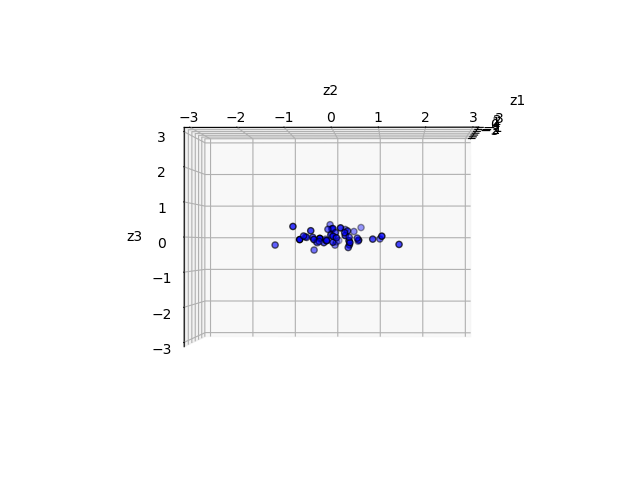

In [21]:
%matplotlib notebook 
# the graph below make points along arrows
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(Z[:,0], Z[:,1], Z[:,2], s=20, marker = 'o', c='b', edgecolor='k', label=0)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
plt.show()

## Dimensionality Reduction

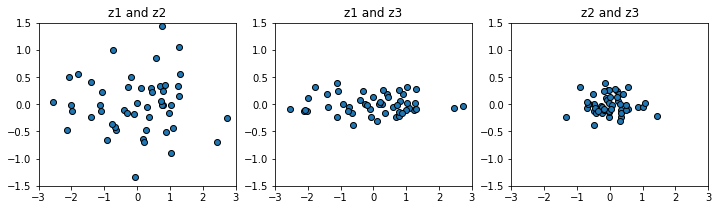

In [20]:
%matplotlib inline

plt.figure(figsize=[12,3])

plt.subplot(131)
plt.scatter(Z[:,0],Z[:,1], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z1 and z2')

plt.subplot(132)
plt.scatter(Z[:,0],Z[:,2], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z1 and z3')

plt.subplot(133)
plt.scatter(Z[:,1],Z[:,2], edgecolor='k')
plt.xlim([-3,3])
plt.ylim([-1.5,1.5])
plt.title('z2 and z3')

plt.show()

It appears that the first two transformed variables, z0 and z1 (which coorespond to pc0 and pc1), capture most of the information contained in the original data set.

## Conducting PCA with sklearn

In [22]:
pca = PCA(n_components=3)
Z = pca.fit_transform(X)

The variable Z contains an array of transformed coordinates.

In [23]:
print(Z[:5,:])

[[-1.97780482 -0.12735838  0.11529583]
 [ 0.69808626  0.34042347 -0.22626109]
 [ 0.59226735  0.85575739 -0.05290937]
 [ 1.25221711  0.34333868 -0.10309832]
 [-1.07059118  0.21639438  0.24550447]]


The object `pca` contains an attribute called `components_` that stores the principal components. 

In [24]:
pc = pca.components_
print(pc)

[[-0.8793447  -0.42686079 -0.21105158]
 [ 0.40167988 -0.42688762 -0.81019765]
 [-0.2557463   0.79721818 -0.54684276]]


## Amount of Variance Explained 

In [27]:
print(pca.explained_variance_ratio_) # first one explains 82 %, second one does 16 %
print(sum(pca.explained_variance_ratio_))

[ 0.82130109  0.16033048  0.01836844]
1.0


In [28]:
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.82130109  0.98163156  1.        ]


To see where these `explained_variance_ratios` come from, lets calculate the variance in the original data. We will define this to be the sum of the squared deviations from each point to the mean, `mu`, divided by `n-1`. 

In [31]:
sq_distances = np.sum( (X - mu)**2, axis=1)
var = np.sum(sq_distances) / 49
print(var)

1.68219538584


We will now calculate the variance of each of the three transformed variables, `z0`, `z1`, and `z2`. 

In [32]:
var_z0 = np.var(Z[:,0], ddof=1)
var_z1 = np.var(Z[:,1], ddof=1)
var_z2 = np.var(Z[:,2], ddof=1)

print(var_z0)
print(var_z1)
print(var_z2)

1.38158889783
0.269707185905
0.0308993021064


In [33]:
print(var)
print(var_z0 + var_z1 + var_z2)

1.68219538584
1.68219538584


In [34]:
print(var_z0 / var)
print(var_z1 / var)
print(var_z2 / var)
print(pca.explained_variance_ratio_)

0.821301086341
0.160330475387
0.0183684382721
[ 0.82130109  0.16033048  0.01836844]


The `pca` object also has an attribute that stores the actual variances of the transformed variables (rather than just the ratios). 

In [35]:
print(pca.explained_variance_)

[ 1.3815889   0.26970719  0.0308993 ]


## Using PCA for Classification

In [39]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [41]:
X, y = make_classification(n_samples=1000, n_features=40, centers=5, cluster_std=16, random_state=1)

model = LogisticRegression()
model.fit(X,y)
print(model.score(X,y))

TypeError: make_classification() got an unexpected keyword argument 'centers'

In [42]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=40, n_informative=20, 
                           n_redundant=18, class_sep=2, random_state=1)

model = LogisticRegression()
model.fit(X,y)
print(model.score(X,y))

0.972


In [46]:
pca = PCA(n_components=15) # try 20 
Z = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.20399399  0.35866003  0.49842565  0.59051865  0.66518762  0.73055637
  0.78515896  0.83268206  0.87315519  0.89592832  0.91790002  0.93483188
  0.95076138  0.96335807  0.97332685]


In [47]:
pca_model = LogisticRegression()
pca_model.fit(Z,y)
print(pca_model.score(Z,y))

0.938


<IPython.core.display.Javascript object>


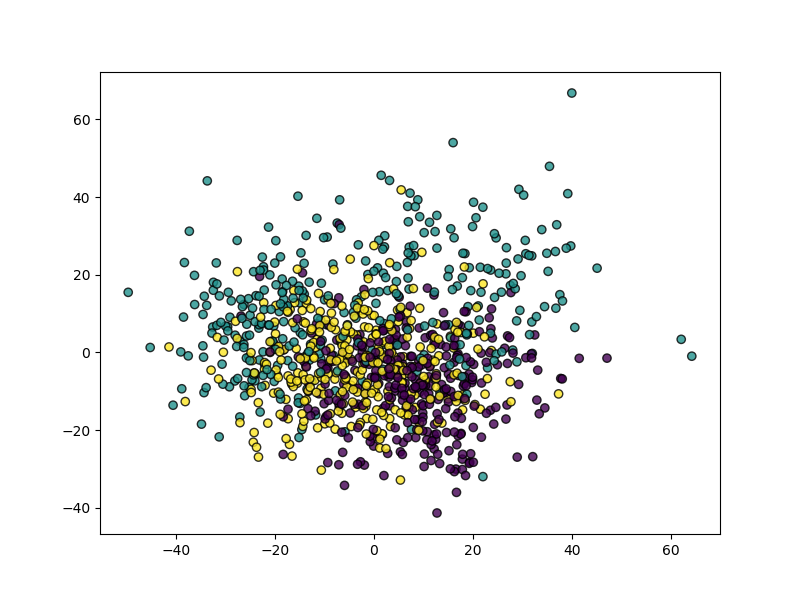

In [45]:
plt.close()
plt.figure(figsize=[8,6])
plt.scatter(Z[:,0], Z[:,1], c=y, edgecolor='k', alpha=0.8)
plt.show()